In [1]:
import datetime
today = datetime.date.today()
date = str(today)
#date = "2020-03-26"

#url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-%s.xlsx" % date
url = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx"

import pandas as pd
data = pd.read_excel(url)

In [2]:
countries = ['DE', 'ES', 'FR', 'IT', 'SE', 'UK', 'US', 'KR', 'JP', 'CN', 'IN']

import math
def rawData(df, title):
    cases = pd.DataFrame(columns = ['Date'])

    for country in countries:
        countryData = df[df['geoId'] == country][['dateRep', title]]
        countryData.columns = ['Date', country]
        cases = pd.merge(cases, countryData, on='Date', how='right')
        cases = cases.fillna(0)

    return cases.sort_values(by=['Date'])

def sumData(df):
    a = df[countries].to_numpy()

    for i in range(1, df.shape[0]):
        a[i] = a[i] + a[i - 1]

    return pd.DataFrame(data=a, index=cases['Date'], columns=countries)

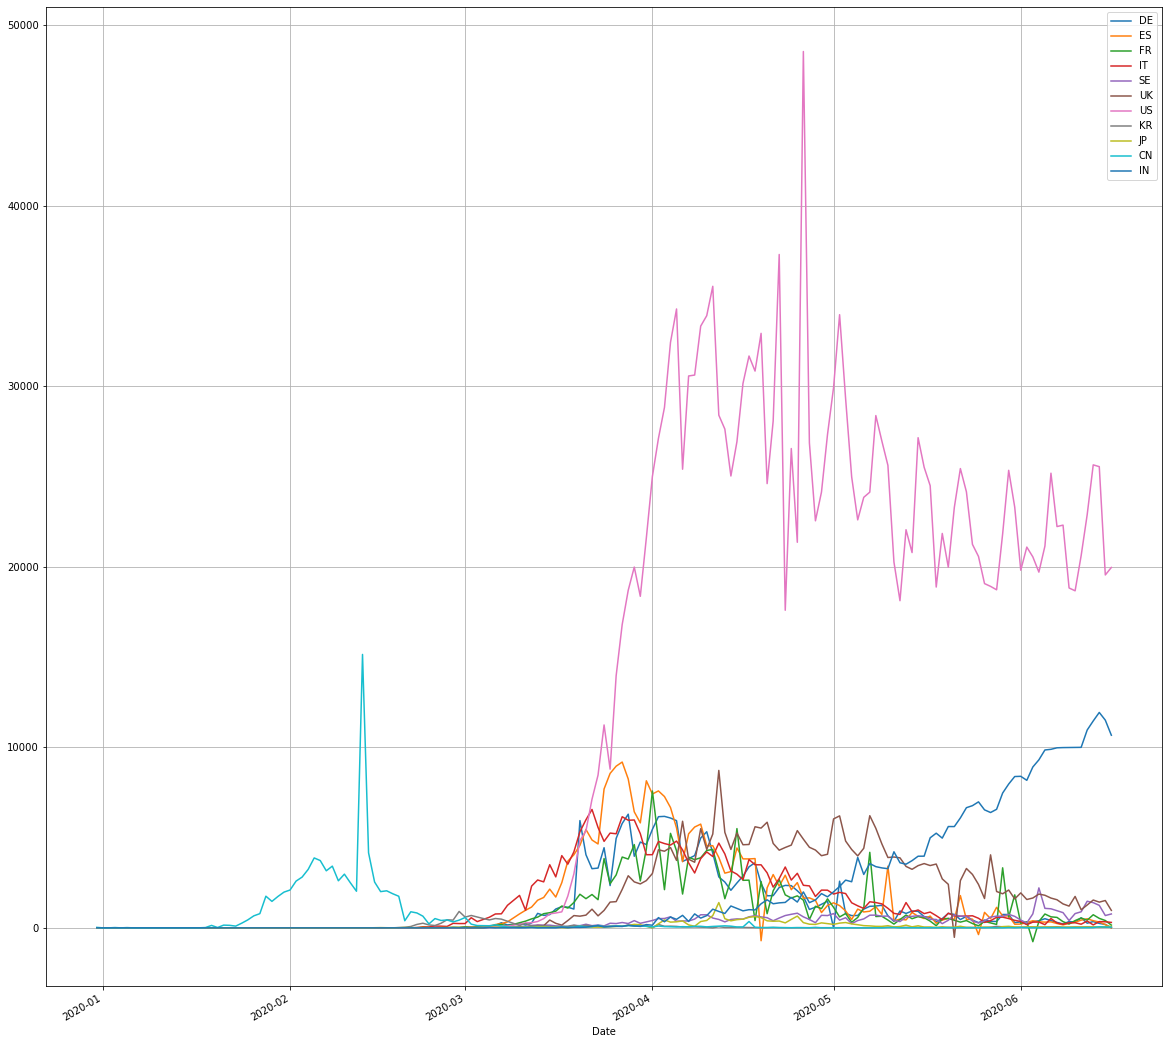

In [3]:
cases = rawData(data, 'cases')
cases.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

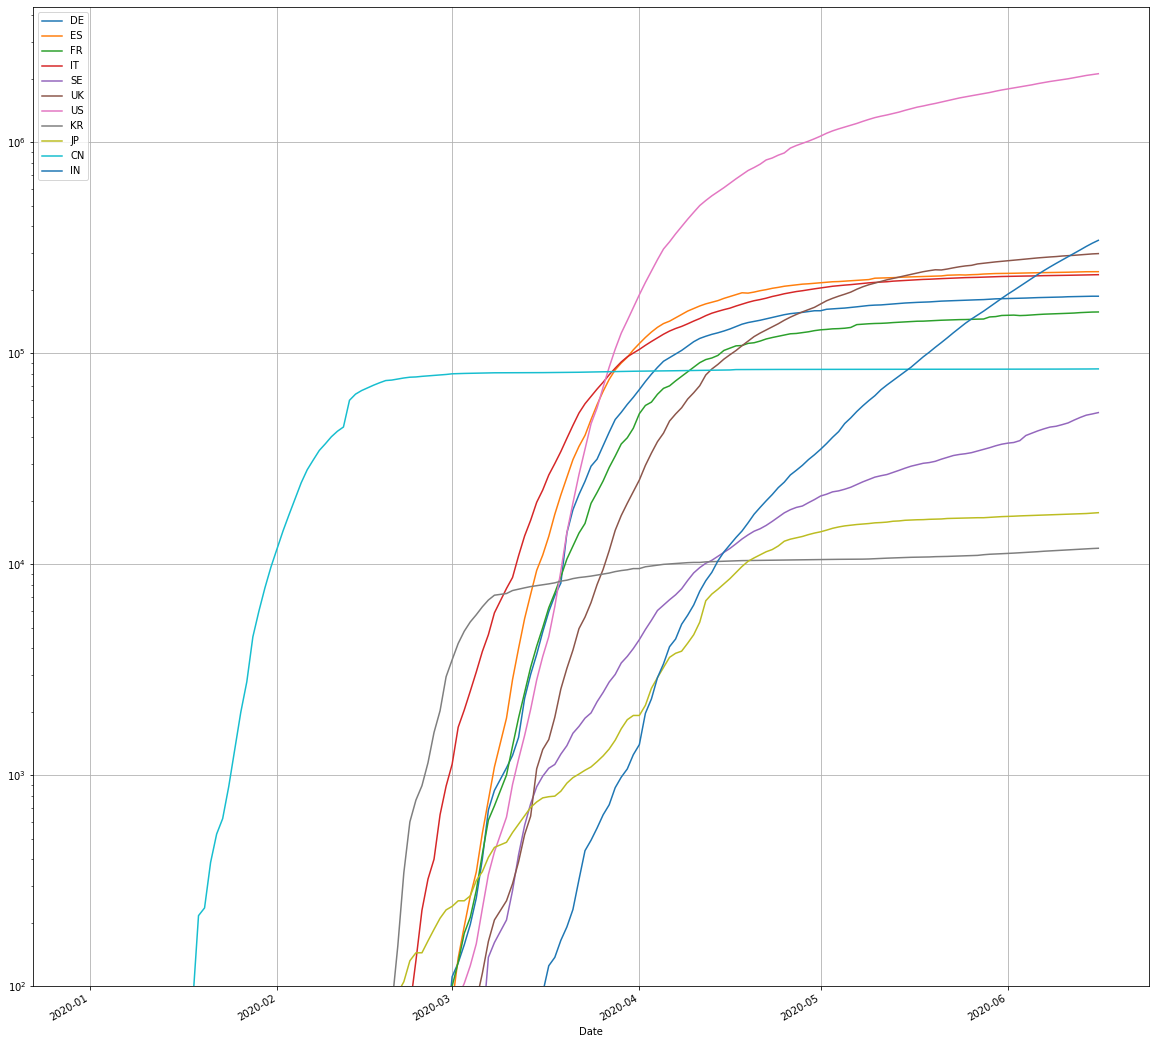

In [4]:
sumCases = sumData(cases)
sumCases.plot.line(logy=True, figsize=(20, 20), ylim=(100, None), grid=True)

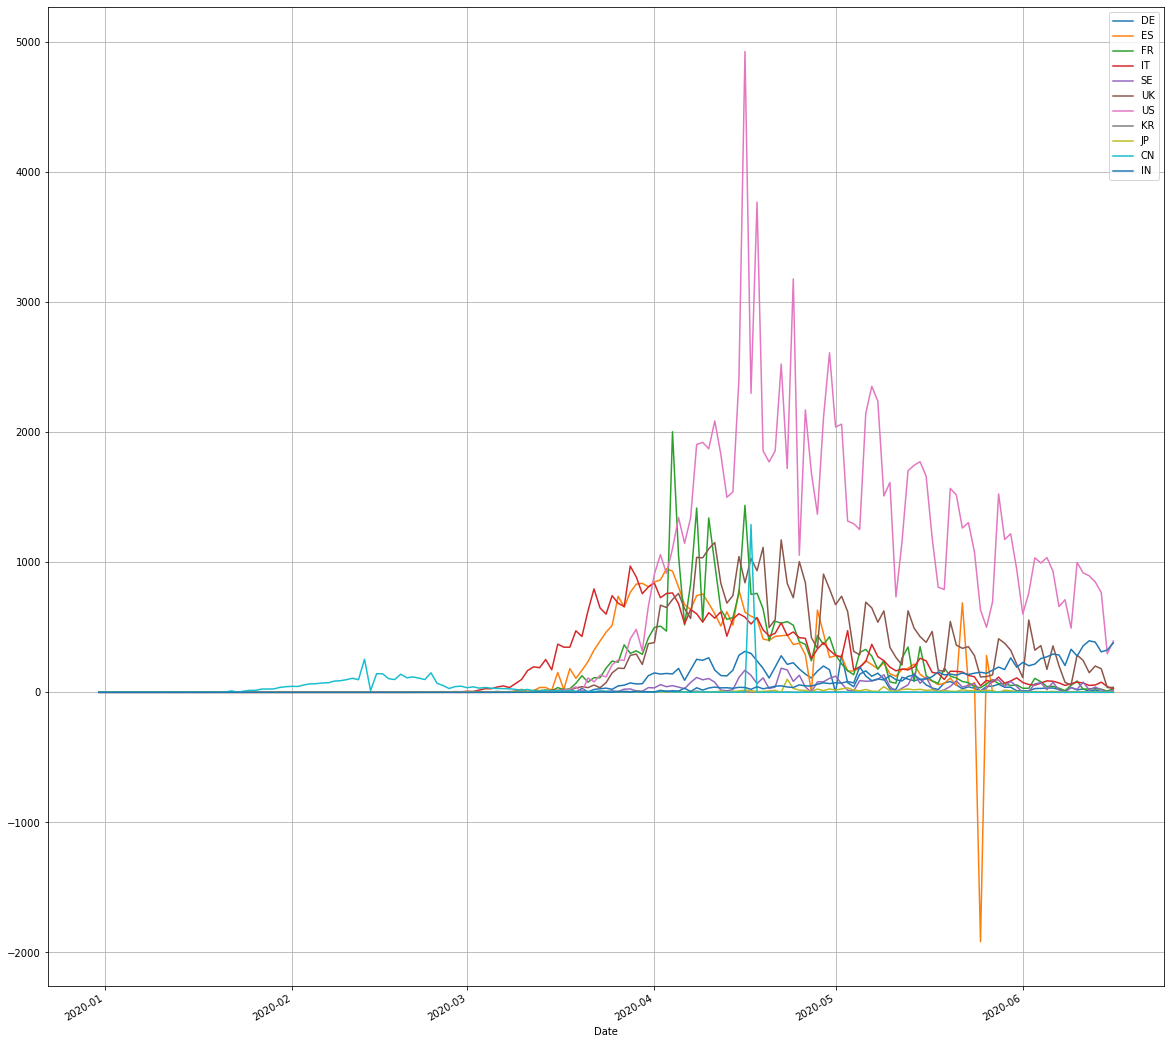

In [5]:
deaths = rawData(data, 'deaths')
deaths.plot.line(x='Date', y=countries, figsize=(20, 20), grid=True)

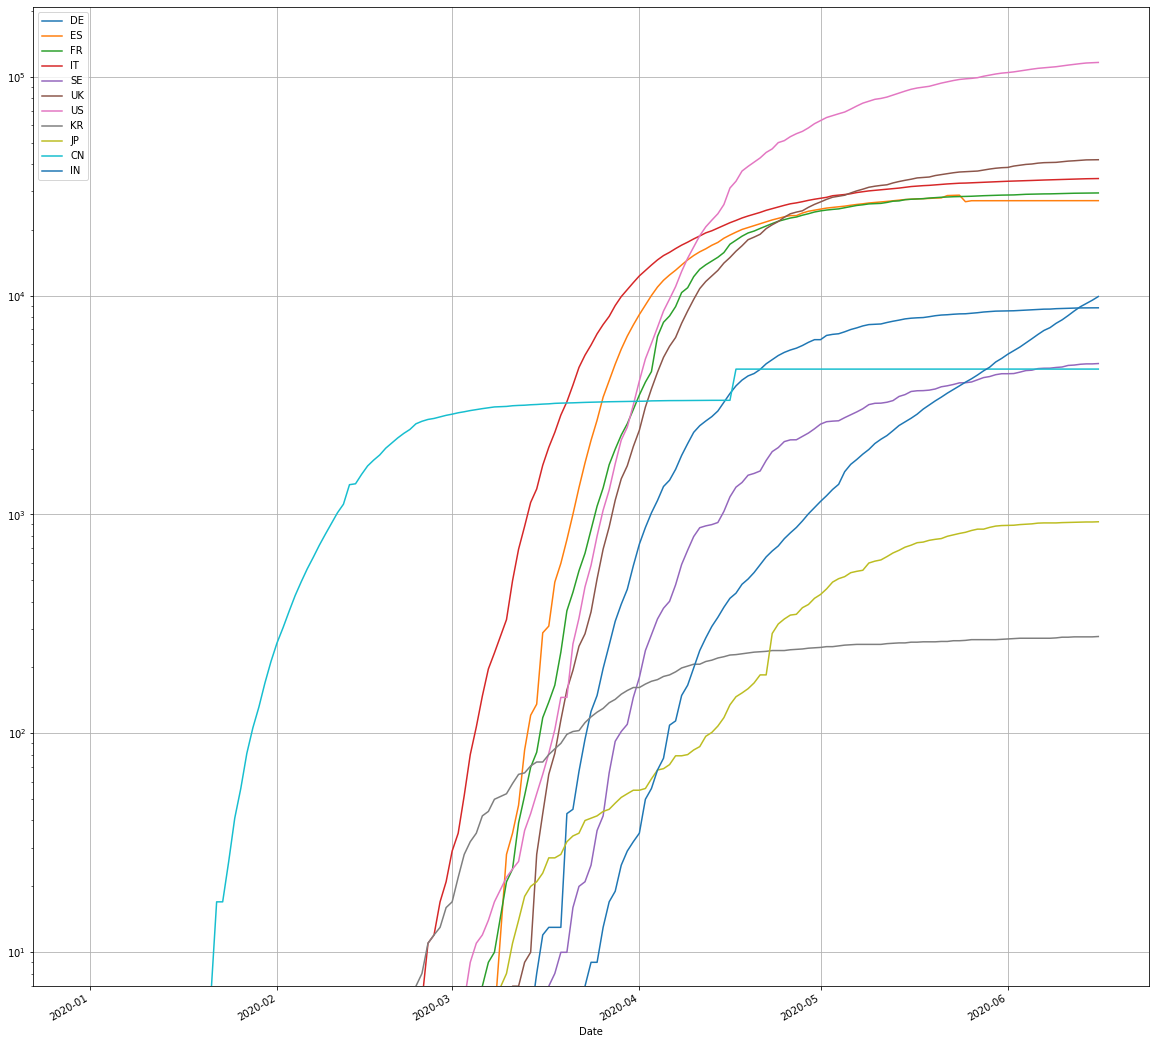

In [6]:
sumDeaths = sumData(deaths)
sumDeaths.plot.line(logy=True, figsize=(20, 20), ylim=(7, None), grid=True)

In [7]:
cases.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-06-02,213.0,294.0,338,178,272,1570,21086,38,46,7,8171
12,2020-06-03,342.0,394.0,-766,318,775,1653,20544,49,56,5,8909
11,2020-06-04,394.0,334.0,352,321,2214,1871,19699,39,32,1,9304
10,2020-06-05,507.0,318.0,767,177,1080,1805,21140,39,46,11,9851
9,2020-06-06,407.0,332.0,611,518,1056,1650,25178,51,39,6,9887
8,2020-06-07,301.0,240.0,579,270,948,1557,22223,57,38,9,9971
7,2020-06-08,214.0,167.0,343,197,843,1326,22302,38,33,5,9983
6,2020-06-09,350.0,249.0,211,280,403,1205,18822,38,36,3,9987
5,2020-06-10,318.0,314.0,403,283,791,1741,18665,50,41,4,9985
4,2020-06-11,555.0,427.0,545,202,890,1003,20614,45,41,11,9996


In [8]:
sumCases.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-06-02,181973.0,239499.0,151681.0,231705.0,37772.0,276265.0,1811156.0,11293.0,16897.0,84109.0,198706.0
2020-06-03,182315.0,239893.0,150915.0,232023.0,38547.0,277918.0,1831700.0,11342.0,16953.0,84114.0,207615.0
2020-06-04,182709.0,240227.0,151267.0,232344.0,40761.0,279789.0,1851399.0,11381.0,16985.0,84115.0,216919.0
2020-06-05,183216.0,240545.0,152034.0,232521.0,41841.0,281594.0,1872539.0,11420.0,17031.0,84126.0,226770.0
2020-06-06,183623.0,240877.0,152645.0,233039.0,42897.0,283244.0,1897717.0,11471.0,17070.0,84132.0,236657.0
2020-06-07,183924.0,241117.0,153224.0,233309.0,43845.0,284801.0,1919940.0,11528.0,17108.0,84141.0,246628.0
2020-06-08,184138.0,241284.0,153567.0,233506.0,44688.0,286127.0,1942242.0,11566.0,17141.0,84146.0,256611.0
2020-06-09,184488.0,241533.0,153778.0,233786.0,45091.0,287332.0,1961064.0,11604.0,17177.0,84149.0,266598.0
2020-06-10,184806.0,241847.0,154181.0,234069.0,45882.0,289073.0,1979729.0,11654.0,17218.0,84153.0,276583.0


In [9]:
deaths.tail(15)

,Date,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
13,2020-06-02,11.0,0.0,31,60,8,556,764,1,2,0,204
12,2020-06-03,29.0,1.0,107,55,65,324,1034,1,6,0,217
11,2020-06-04,30.0,5.0,81,71,74,359,994,0,3,0,260
10,2020-06-05,32.0,1.0,44,88,20,176,1036,0,4,0,273
9,2020-06-06,33.0,1.0,46,85,77,357,932,0,7,0,294
8,2020-06-07,22.0,1.0,31,72,17,204,659,0,2,0,287
7,2020-06-08,6.0,0.0,13,53,3,77,712,0,0,0,206
6,2020-06-09,37.0,0.0,54,65,35,55,493,1,0,0,331
5,2020-06-10,18.0,0.0,87,79,23,286,999,2,3,0,279
4,2020-06-11,26.0,0.0,23,71,78,245,918,0,1,0,357


In [10]:
sumDeaths.tail(15)

,DE,ES,FR,IT,SE,UK,US,KR,JP,CN,IN
Date,,,,,,,,,,,
2020-06-02,8522.0,27127.0,28824.0,33342.0,4403.0,39045.0,105143.0,271.0,893.0,4615.0,5598.0
2020-06-03,8551.0,27128.0,28931.0,33397.0,4468.0,39369.0,106177.0,272.0,899.0,4615.0,5815.0
2020-06-04,8581.0,27133.0,29012.0,33468.0,4542.0,39728.0,107171.0,272.0,902.0,4615.0,6075.0
2020-06-05,8613.0,27134.0,29056.0,33556.0,4562.0,39904.0,108207.0,272.0,906.0,4615.0,6348.0
2020-06-06,8646.0,27135.0,29102.0,33641.0,4639.0,40261.0,109139.0,272.0,913.0,4615.0,6642.0
2020-06-07,8668.0,27136.0,29133.0,33713.0,4656.0,40465.0,109798.0,272.0,915.0,4615.0,6929.0
2020-06-08,8674.0,27136.0,29146.0,33766.0,4659.0,40542.0,110510.0,272.0,915.0,4615.0,7135.0
2020-06-09,8711.0,27136.0,29200.0,33831.0,4694.0,40597.0,111003.0,273.0,915.0,4615.0,7466.0
2020-06-10,8729.0,27136.0,29287.0,33910.0,4717.0,40883.0,112002.0,275.0,918.0,4615.0,7745.0
